<a href="https://colab.research.google.com/github/DasireddyMeghana/Meghana_INFO5731_Spring2024/blob/main/Assignments/Dasireddy_Meghana_Assignment_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Write your code here

import pandas as pd
import re
from collections import defaultdict

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/5731/cleaned_movie_reviews.csv')

# Tokenize the reviews
def tokenize(text):
    return re.findall(r'\b\w+\b', text.lower())

# Calculate N-grams
def ngrams(tokens, n):
    return [tuple(tokens[i:i+n]) for i in range(len(tokens)-n+1)]

# (1) Count the frequency of all the N-grams (N=3)
trigrams_count = defaultdict(int)
for review in data['Cleaned_Review']:
    tokens = tokenize(review)
    trigrams = ngrams(tokens, 3)
    for trigram in trigrams:
        trigrams_count[trigram] += 1

# Calculate bigram frequencies and word frequencies for the probability calculation
bigrams_count = defaultdict(int)
word_count = defaultdict(int)
for review in data['Cleaned_Review']:
    tokens = tokenize(review)
    bigrams = ngrams(tokens, 2)
    for bigram in bigrams:
        bigrams_count[bigram] += 1
        word_count[bigram[0]] += 1

# (2) Calculate the probabilities for all the bigrams in the dataset
bigram_probabilities = {bigram: count / word_count[bigram[0]] for bigram, count in bigrams_count.items()}

# Calculate relative probabilities for noun phrases across the dataset
bigram_frequencies = defaultdict(int)
for review in data['Cleaned_Review']:
    tokens = tokenize(review)
    bigrams = ngrams(tokens, 2)
    for bigram in bigrams:
        bigram_frequencies[bigram] += 1
max_bigram_frequency = max(bigram_frequencies.values())

reviews_relative_probabilities = []
for index, row in data.iterrows():
    review_bigrams = ngrams(tokenize(row['Cleaned_Review']), 2)
    review_bigram_frequencies = defaultdict(int)
    for bigram in review_bigrams:
        review_bigram_frequencies[bigram] += 1
    # (3) Calculate relative probabilities of each review in terms of other reviews
    relative_probabilities = {bigram: freq / max_bigram_frequency for bigram, freq in review_bigram_frequencies.items()}
    reviews_relative_probabilities.append(relative_probabilities)

flattened_relative_probabilities = defaultdict(lambda: [0] * len(data))
for i, review_probs in enumerate(reviews_relative_probabilities):
    for bigram, prob in review_probs.items():
        flattened_relative_probabilities[bigram][i] = prob

# Convert to a DataFrame for display, with rows as reviews and columns as bigrams (approximated noun phrases)
noun_phrases_df = pd.DataFrame(flattened_relative_probabilities)
noun_phrases_df.index = [f"Review {i+1}" for i in range(len(data))]

# Print the results

print("Trigram Counts:")
print(list(trigrams_count.items())[:4])

print("\nBigram Probabilities:")
print(list(bigram_probabilities.items())[:4])

# display a portion of the DataFrame
print()
print(noun_phrases_df.iloc[:100, :100])





Trigram Counts:
[(('confidently', 'directed', 'dark'), 40), (('directed', 'dark', 'brooding'), 40), (('dark', 'brooding', 'packed'), 40), (('brooding', 'packed', 'impressive'), 40)]

Bigram Probabilities:
[(('confidently', 'directed'), 1.0), (('directed', 'dark'), 0.5), (('dark', 'brooding'), 0.023255813953488372), (('brooding', 'packed'), 0.5)]

           confidently  directed      dark  brooding     packed impressive  \
              directed      dark  brooding    packed impressive     action   
Review 1      0.000714  0.000714  0.000714  0.000714   0.000714   0.000714   
Review 2      0.000000  0.000000  0.000000  0.000000   0.000000   0.000000   
Review 3      0.000000  0.000000  0.000000  0.000000   0.000000   0.000000   
Review 4      0.000000  0.000000  0.000000  0.000000   0.000000   0.000000   
Review 5      0.000000  0.000000  0.000000  0.000000   0.000000   0.000000   
...                ...       ...       ...       ...        ...        ...   
Review 96     0.000000  0.0

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [3]:
# Write your code here
import math

# Function to compute term frequency (TF) in a document
def compute_tf(tokens):
    # (1) To build the documents-terms weights matrix, first calculate TF
    tf = defaultdict(int)
    for token in tokens:
        tf[token] += 1
    total_terms = len(tokens)
    for term in tf:
        tf[term] = tf[term] / total_terms
    return tf

# Function to compute inverse document frequency (IDF) across all documents
def compute_idf(documents):
    # Part of (1): Calculate IDF as part of the TF-IDF calculation
    idf = defaultdict(lambda: 0)
    total_documents = len(documents)

    for document in documents:
        seen_terms = set(document)
        for term in seen_terms:
            idf[term] += 1

    for term in idf:
        idf[term] = math.log(total_documents / idf[term])
    return idf

# Tokenize and calculate TF for each document
tokenized_reviews = [tokenize(review) for review in data['Cleaned_Review']]
tf_per_document = [compute_tf(tokens) for tokens in tokenized_reviews]

# Calculate IDF across all documents
idf = compute_idf(tokenized_reviews)

# Calculate TF-IDF weights for each document
tf_idf_weights = []
for tf in tf_per_document:
    # Final step in (1): Combine TF and IDF to get TF-IDF weights
    doc_tf_idf = {}
    for term, value in tf.items():
        doc_tf_idf[term] = value * idf[term]
    tf_idf_weights.append(doc_tf_idf)
tf_idf_df = pd.DataFrame(tf_idf_weights, columns=list(idf.keys()))
print(tf_idf_df)

# Optionally, if you want to round the values for easier reading, you can use:
tf_idf_df = tf_idf_df.round(6)

# Function to compute cosine similarity
def compute_cosine_similarity(doc_vector, query_vector):
    # Part of (2): Use cosine similarity to rank documents with respect to a query
    dot_product = sum(doc_vector.get(term, 0) * query_vector.get(term, 0) for term in query_vector)
    doc_magnitude = sum(val ** 2 for val in doc_vector.values()) ** 0.5
    query_magnitude = sum(val ** 2 for val in query_vector.values()) ** 0.5
    if doc_magnitude == 0 or query_magnitude == 0:
        return 0  # Avoid division by zero
    return dot_product / (doc_magnitude * query_magnitude)

# Design your query
query = "A thrilling adventure with stunning visuals and memorable performances"
query_tokens = tokenize(query)
query_tf = compute_tf(query_tokens)
query_tf_idf = {term: query_tf.get(term, 0) * idf.get(term, 0) for term in query_tokens}

# Calculate cosine similarity for each document with the query
cosine_similarities = [compute_cosine_similarity(doc_tf_idf, query_tf_idf) for doc_tf_idf in tf_idf_weights]

# Rank documents based on cosine similarity
document_ranking = sorted(enumerate(cosine_similarities, 1), key=lambda x: x[1], reverse=True)

# Display top ranked documents
for doc_id, similarity in document_ranking[:5]:
    print(f"Document {doc_id} with similarity {similarity}")

         turn   created  careerdefining     heath   complex     comic  \
0    0.059116  0.103835        0.103835  0.004124  0.068396  0.041063   
1         NaN       NaN             NaN  0.002314       NaN  0.005760   
2         NaN       NaN             NaN  0.002905  0.048188       NaN   
3         NaN       NaN             NaN  0.002346       NaN  0.011679   
4         NaN       NaN             NaN  0.002609       NaN       NaN   
..        ...       ...             ...       ...       ...       ...   
995       NaN       NaN             NaN  0.001031       NaN  0.006844   
996       NaN       NaN             NaN       NaN       NaN  0.021216   
997       NaN       NaN             NaN       NaN       NaN       NaN   
998       NaN       NaN             NaN       NaN       NaN       NaN   
999       NaN       NaN             NaN  0.003001       NaN       NaN   

         book      best      well    batman  ...     ahead   towards  \
0    0.046036  0.012441  0.032956  0.008853  ...   

## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [4]:
# Write your code here

from gensim.models import Word2Vec
#(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

# Preprocess the data: Tokenizing the cleaned reviews
sentences = [review.split() for review in data['Cleaned_Review']]

# Train a Word2Vec model
model = Word2Vec(sentences, vector_size=300, window=5, min_count=1, workers=4)

# Save the model for later use
model.save("word2vec_movie_reviews.model")






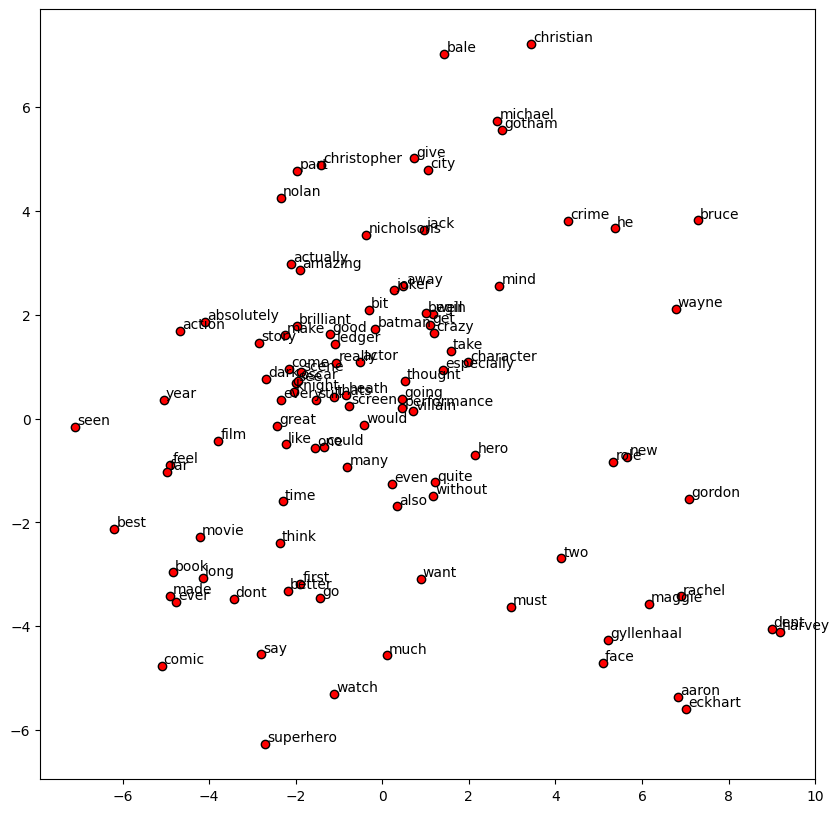

In [5]:
#(2) Visualize the word embedding model you created.

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the model
model = Word2Vec.load("word2vec_movie_reviews.model")

# Extract the word vectors
word_vectors = model.wv

# Select the top 100 words
words = list(word_vectors.index_to_key[:100])
vectors = [word_vectors[word] for word in words]

# Reduce dimensions to 2D using PCA
pca = PCA(n_components=2)
vectors_2d = pca.fit_transform(vectors)

# Plot
plt.figure(figsize=(10,10))
plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], edgecolors='k', c='r')
for word, (x, y) in zip(words, vectors_2d):
    plt.text(x + 0.05, y + 0.05, word)

plt.show()


## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [13]:
# The GitHub link of your final csv file

# Link:
https://github.com/DasireddyMeghana/Meghana_INFO5731_Spring2024/blob/main/Assignments/sentimental_movie_review_updated.csv

# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [ ]:
# Type your answer
#when working on this assignment was really enjoyable! It did take a bit longer than expected, but I ended up learning a ton of new concepts, especially when it comes to N-grams.
#It's actually quite fun diving into them and understanding how they work.